In [1]:
#单一变量分析，Yuntao

#载入库
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

#数据读取整理
df = pd.read_csv("adult.data.txt", header=None, sep=", ")
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "class"]
df = df[df["workclass"] != '?']
df = df[df["education"] != '?']
df = df[df["marital-status"] != '?']
df = df[df["occupation"] != '?']
df = df[df["relationship"] != '?']
df = df[df["race"] != '?']
df = df[df["sex"] != '?']
df = df[df["native-country"] != '?']

#数据显示，income数据整理
below = df[df["class"] == "<=50K"]
above = df[df["class"] == ">50K"]
print("Count(Above 50K) = " + str(len(above.index)))
print("Count(Below 50K) = " + str(len(below.index)))

df.head()

<ipython-input-1-64cd34555598>:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("adult.data.txt", header=None, sep=", ")


Count(Above 50K) = 7508
Count(Below 50K) = 22654


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
def analyze_numerical_data(column):
    above_50k = list(above[column])
    below_50k = list(below[column])
    
    print(column)
    print()
    print("Mean")
    print("Above 50K = " + str(np.mean(above_50k)))
    print("Below 50K = " + str(np.mean(below_50k)))
    print()
    print("Median")
    print("Above 50K = " + str(np.median(above_50k)))
    print("Below 50K = " + str(np.median(below_50k)))
    print()
    print("Standard Deviation")
    print("Above 50K = " + str(np.std(above_50k)))
    print("Below 50K = " + str(np.std(below_50k)))

    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
    fig.subplots_adjust(hspace=.5)
    
    axes[0, 0].boxplot(above_50k)
    axes[0, 0].set_title(">50K")
    axes[0, 0].set_xlabel(column)
    
    axes[0, 1].boxplot(below_50k)
    axes[0, 1].set_title("<=50K")
    axes[0, 1].set_xlabel(column)
    
    axes[1, 0].hist(above_50k)
    axes[1, 0].set_title(">50K")
    axes[1, 0].set_xlabel(column)
    
    axes[1, 1].hist(below_50k)
    axes[1, 1].set_title("<=50K")
    axes[1, 1].set_xlabel(column)
    
    plt.show()
    

def analyze_categorical_data(column):
    above_50k = Counter(above[column])
    below_50k = Counter(below[column])

    print(column)
    print()
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(5,10))
    axes[0].pie(above_50k.values(), labels=above_50k.keys(), autopct='%1.0f%%')
    axes[0].set_title(">50K")
    axes[1].pie(below_50k.values(), labels=below_50k.keys(), autopct='%1.0f%%')
    axes[1].set_title("<=50K")
    plt.show()
    
    
def analyze_per_unique_value(column):
    unique_values = df[column].unique()
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=len(unique_values), figsize=(5,5 * len(unique_values)))

    for i, val in enumerate(unique_values):
        val_df = df[df[column] == val]
        above_50k = val_df[val_df["class"] == ">50K"]
        below_50k = val_df[val_df["class"] == "<=50K"]
        axes[i].pie([len(below_50k.index), len(above_50k.index)], labels=["<=50K (Count-" + str(len(below_50k.index)) + ")", ">50K (Count-" + str(len(above_50k.index)) + ")"], autopct='%1.0f%%')
        axes[i].set_title(val)
    
    plt.show()

capital-gain

Mean
Above 50K = 3937.6798082045816
Below 50K = 148.8938377328507

Median
Above 50K = 0.0
Below 50K = 0.0

Standard Deviation
Above 50K = 14385.101938325177
Below 50K = 936.3716120599768


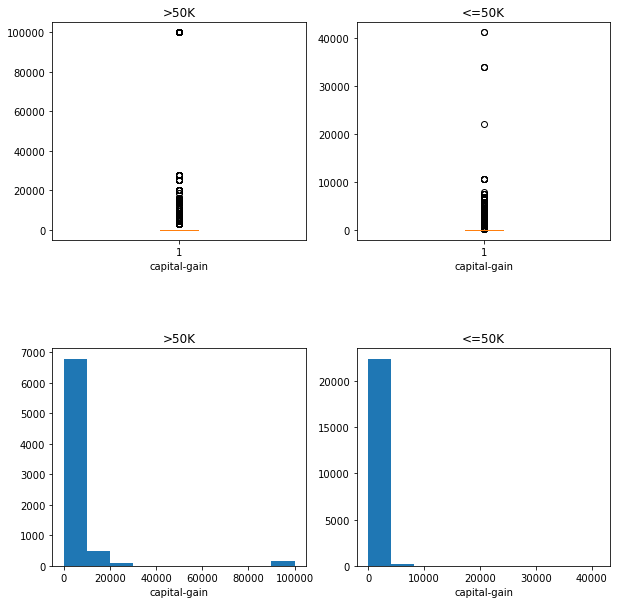

In [3]:
#分析Capital-gain
analyze_numerical_data("capital-gain")

Inference:

If the capital-gain is high, it is more like that the person earns more than 50K

capital-loss

Mean
Above 50K = 193.75066595631327
Below 50K = 53.44800035313852

Median
Above 50K = 0.0
Below 50K = 0.0

Standard Deviation
Above 50K = 592.7861087307447
Below 50K = 310.2634148738493


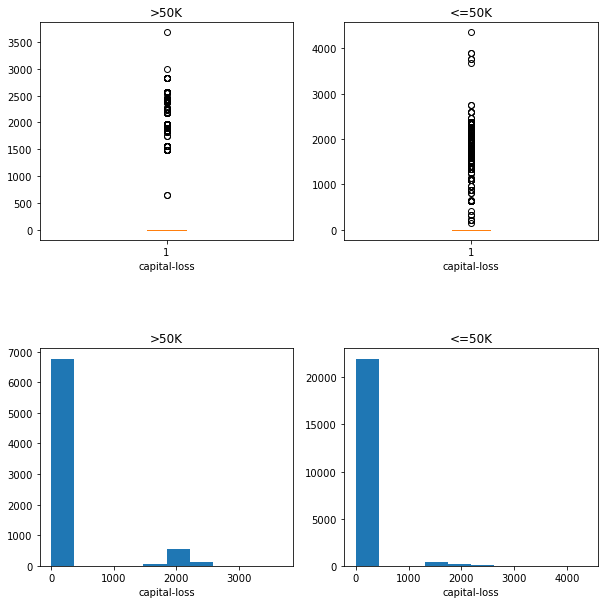

In [4]:
#分析Capital-loss
analyze_numerical_data("capital-loss")

Inference:

The capital-loss is more or less the same for both the classes of people. So this may not be a good factor that can be used to classify the data.

hours-per-week

Mean
Above 50K = 45.70657964837507
Below 50K = 39.34859186015715

Median
Above 50K = 40.0
Below 50K = 40.0

Standard Deviation
Above 50K = 10.736271573483807
Below 50K = 11.950510368604052


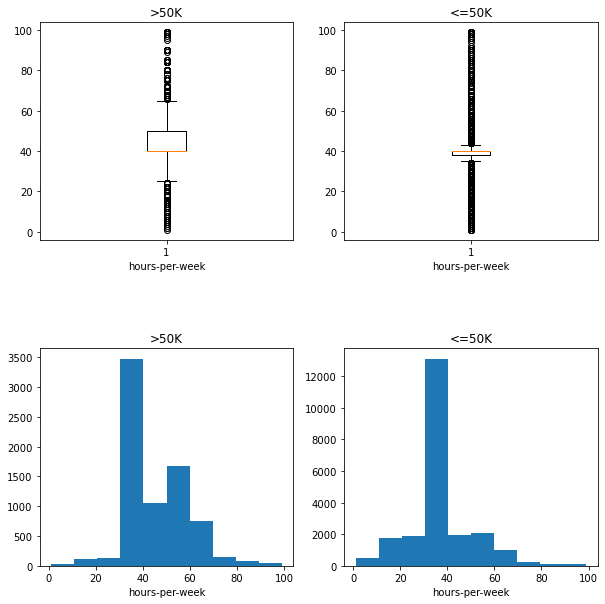

In [5]:
#分析hours-per-week
analyze_numerical_data("hours-per-week")

Inference

Most people working more than 40 hours a week belong to the ">50K" category.

native-country



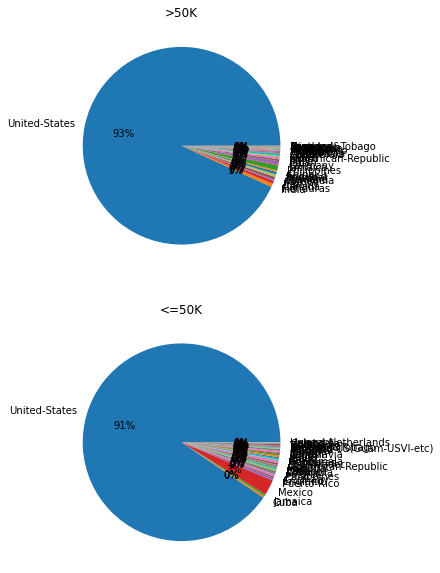

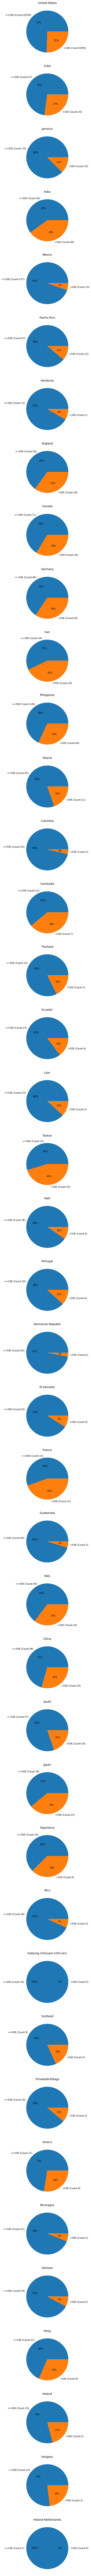

In [6]:
#分析Native-country
analyze_categorical_data("native-country")
print()
print()
analyze_per_unique_value("native-country")

sex



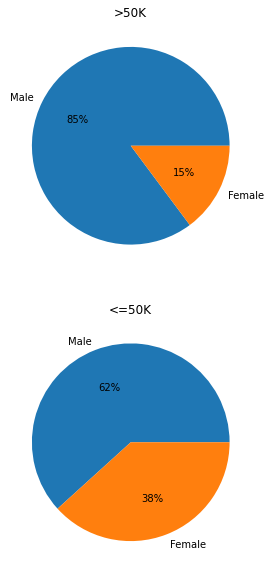

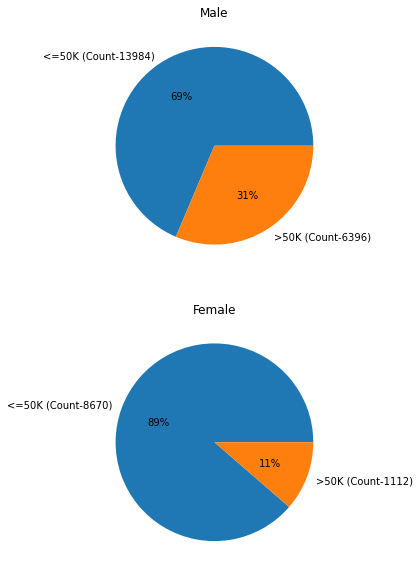

In [7]:
#分析Sex
analyze_categorical_data("sex")
print()
print()
analyze_per_unique_value("sex")

race



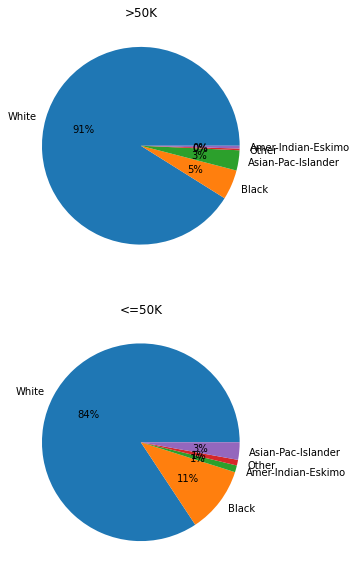

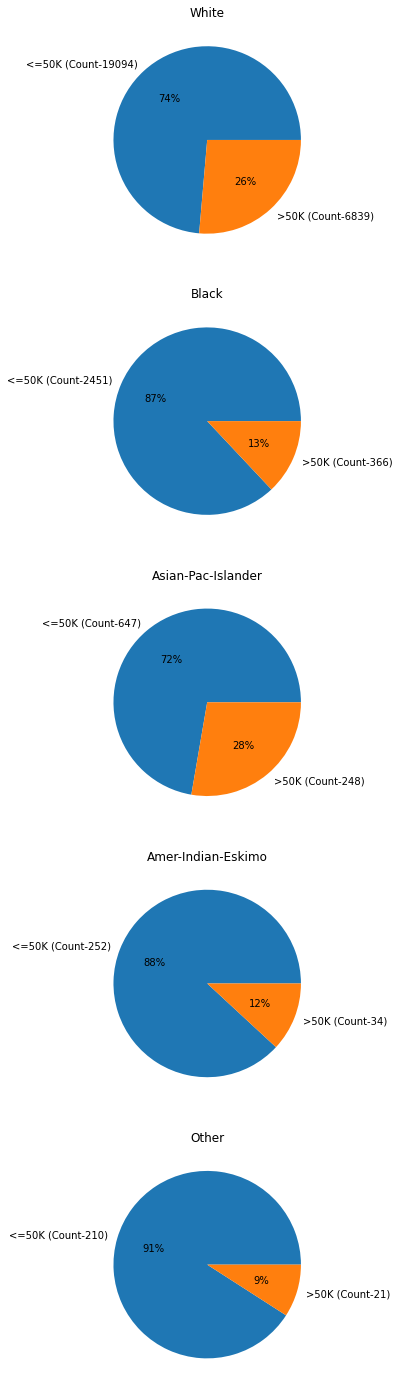

In [8]:
#分析Race
analyze_categorical_data("race")
print()
print()
analyze_per_unique_value("race")

relationship



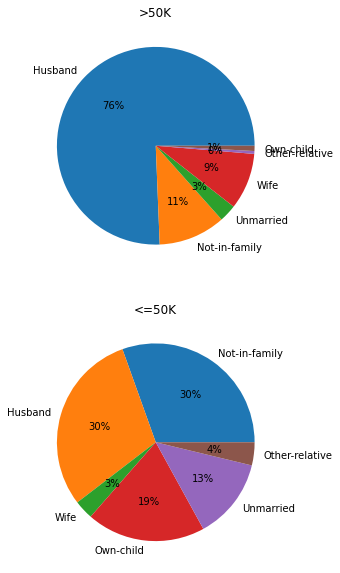

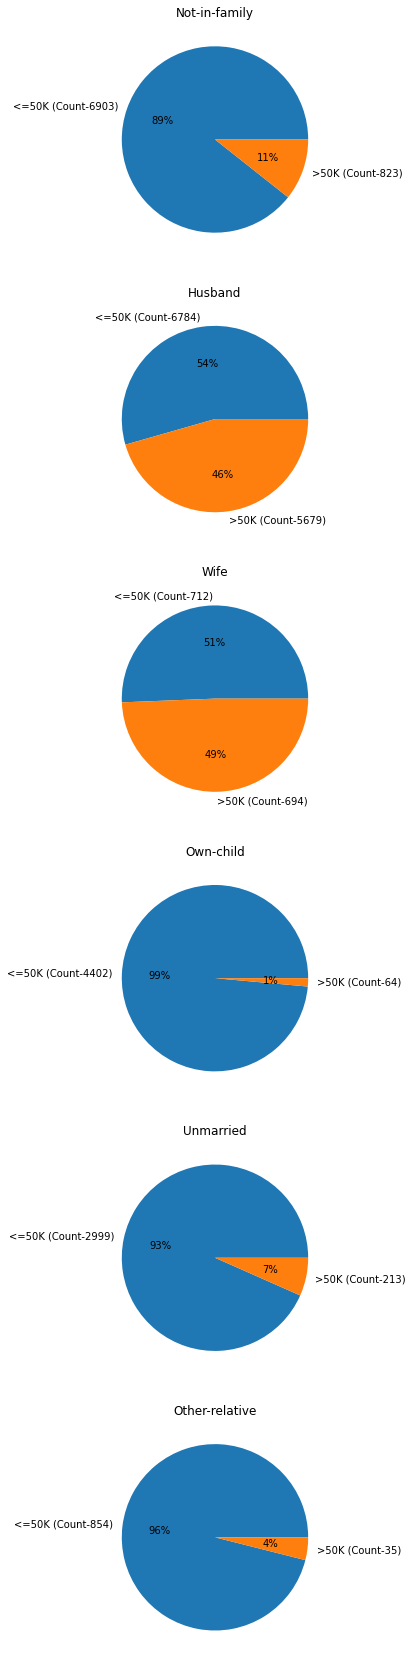

In [9]:
#分析Relationship
analyze_categorical_data("relationship")
print()
print()
analyze_per_unique_value("relationship")

occupation



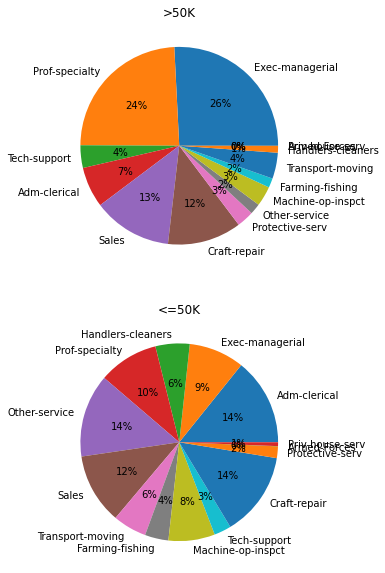

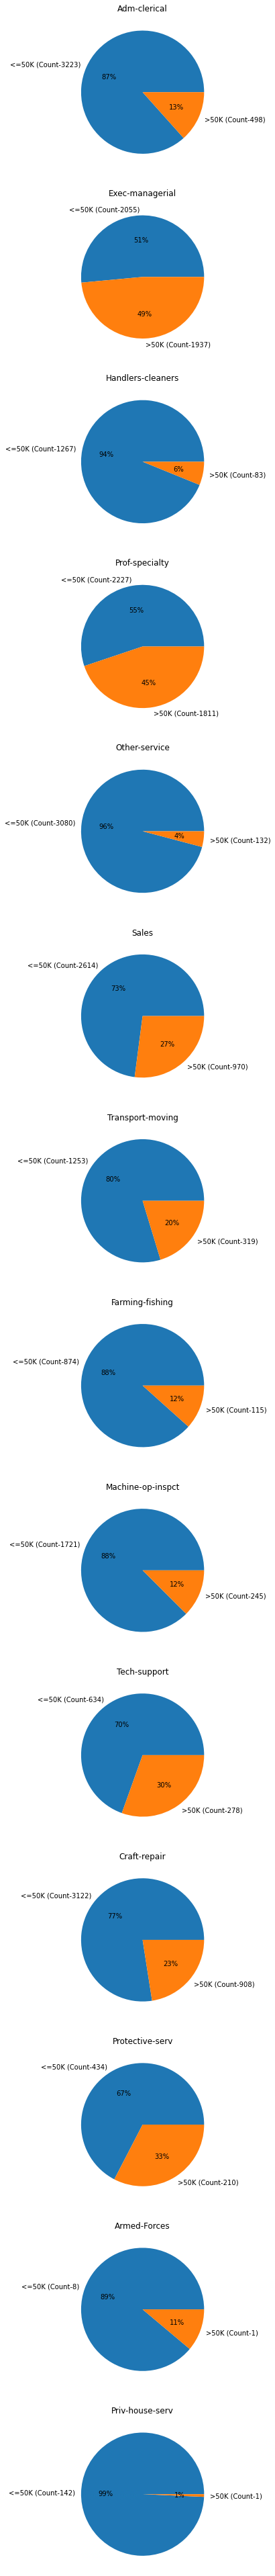

In [10]:
#分析occupation
analyze_categorical_data("occupation")
print()
print()
analyze_per_unique_value("occupation")

marital-status



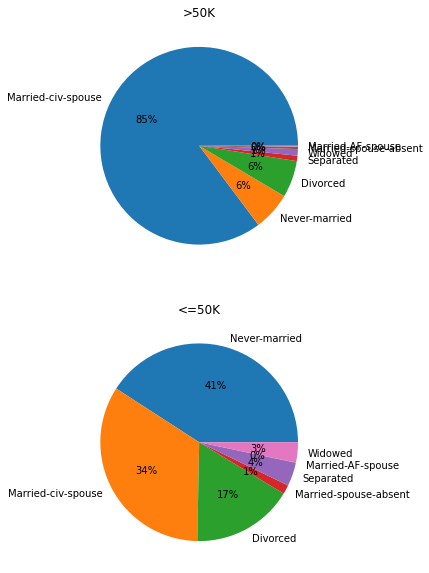

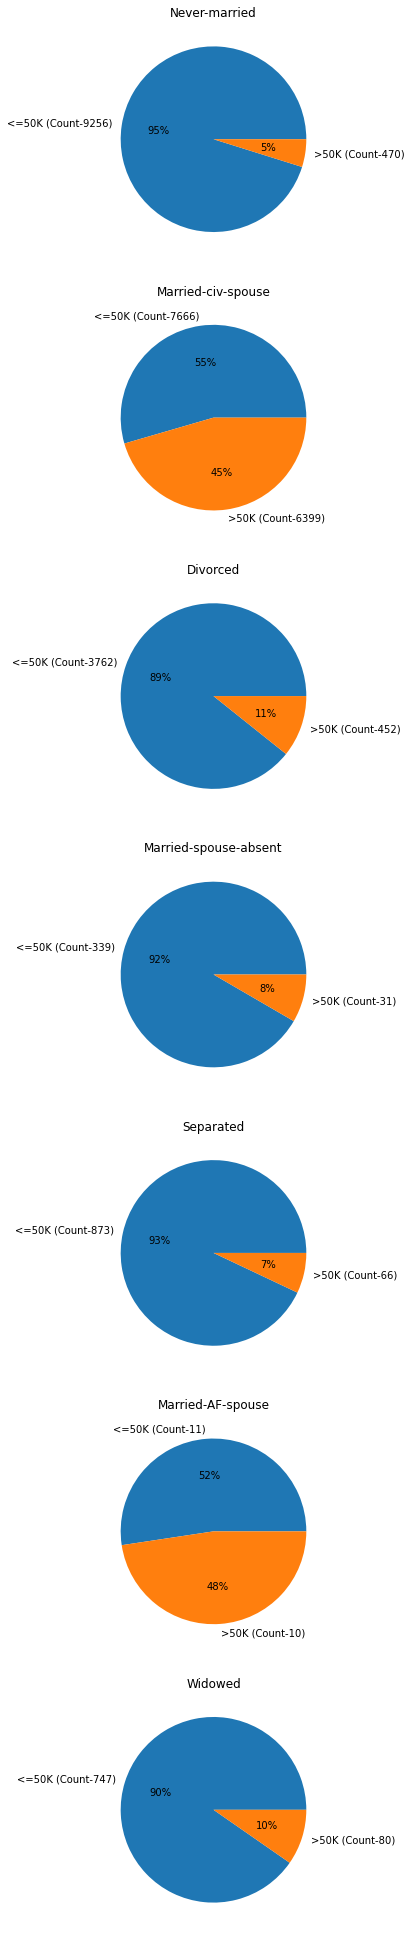

In [11]:
#分析Marital-status
analyze_categorical_data("marital-status")
print()
print()
analyze_per_unique_value("marital-status")

education-num

Mean
Above 50K = 11.606419818859882
Below 50K = 9.629116270857244

Median
Above 50K = 12.0
Below 50K = 9.0

Standard Deviation
Above 50K = 2.3682652194812
Below 50K = 2.413542861800171


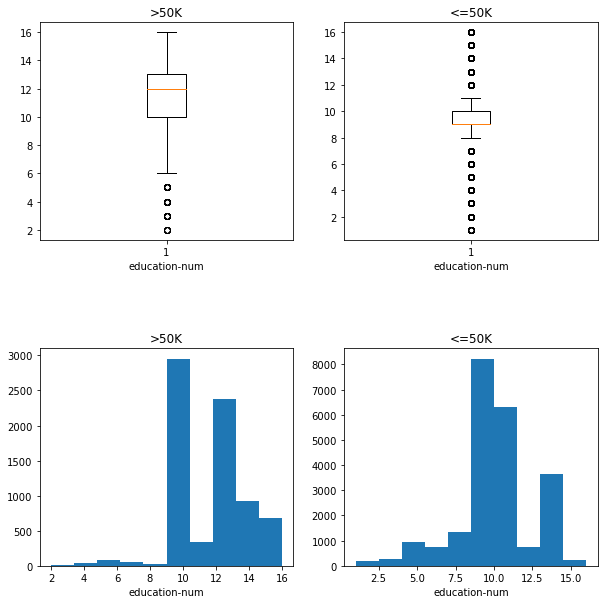

In [12]:
#分析Education-num
analyze_numerical_data("education-num")

education



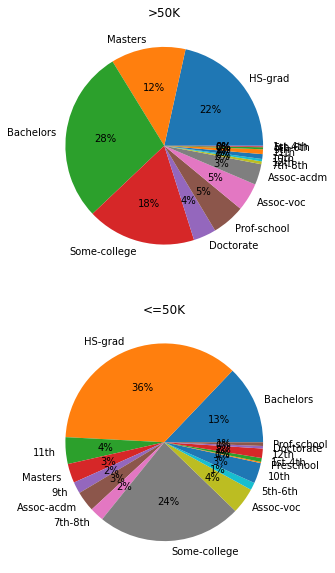

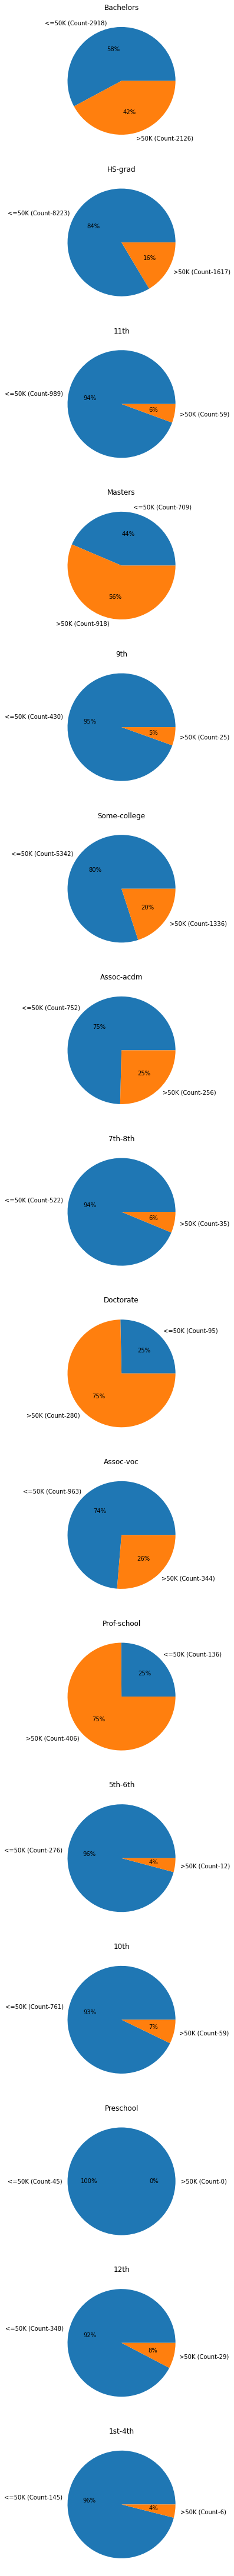

In [13]:
#分析Education
analyze_categorical_data("education")
print()
print()
analyze_per_unique_value("education")

fnlwgt

Mean
Above 50K = 188149.96217368142
Below 50K = 190338.64672905448

Median
Above 50K = 176185.0
Below 50K = 179508.5

Standard Deviation
Above 50K = 102814.88940721683
Below 50K = 106568.99082609416


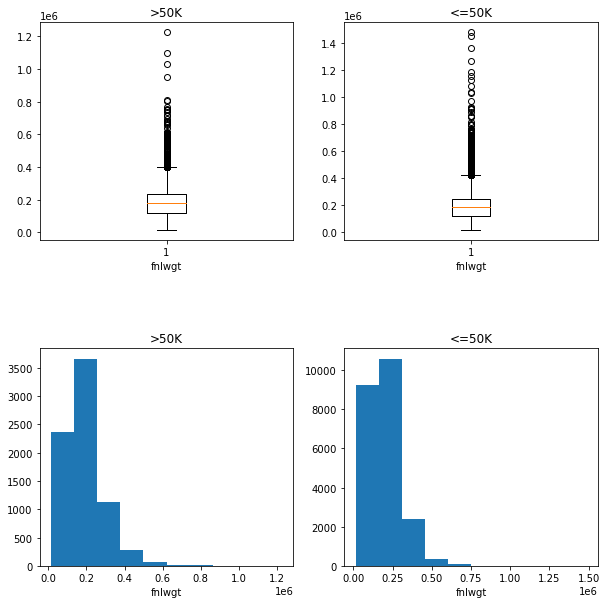

In [14]:
#分析Fnlwgt
analyze_numerical_data("fnlwgt")

workclass



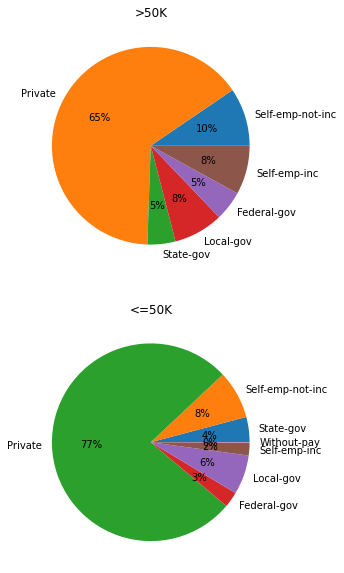

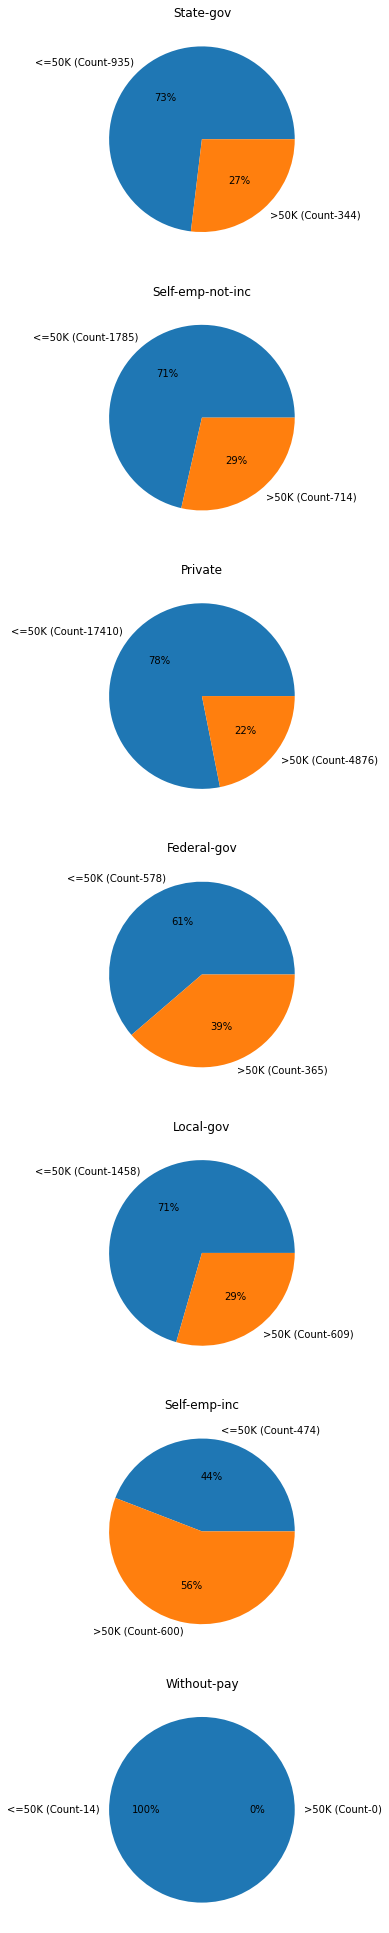

In [15]:
#分析Workclass
analyze_categorical_data("workclass")
print()
print()
analyze_per_unique_value("workclass")

age

Mean
Above 50K = 43.95911028236548
Below 50K = 36.60806038668668

Median
Above 50K = 43.0
Below 50K = 34.0

Standard Deviation
Above 50K = 10.268948900217353
Below 50K = 13.464334073886043


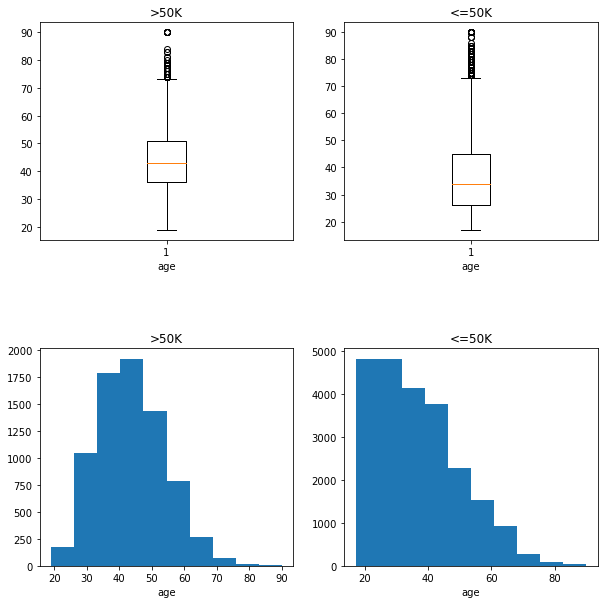

In [16]:
#分析Age
analyze_numerical_data("age")